<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Subsurface Data Analytics 

### Linear Regression for Subsurface Data Analytics in Python 


#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)




### PGE 383 Exercise: Linear Regression for Subsurface Modeling in Python 

Here's a simple workflow, demonstration of linera regression for subsurface modeling workflows. This should help you get started with building subsurface models that data analytics and machine learning. Here's some basic details about linear regression. 


## Linear Regression in Python for Engineers, Data Scientists and Geoscientists 
### Michael Pyrcz, Associate Professor, University of Texas at Austin 

#### Contacts: [Twitter/@GeostatsGuy](https://twitter.com/geostatsguy) | [GitHub/GeostatsGuy](https://github.com/GeostatsGuy) | [www.michaelpyrcz.com](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446)

Here's a simple workflow, demonstration of linear regression for subsurface modeling workflows. This should help you get started with building subsurface models that data analytics and machine learning. Here's some basic details about linear regression.  

#### Linear Regression

Linear regression for prediction.  Here are some key aspects of linear regression:

**Parametric Model**

* the fit model is a simple weighted linear additive model based on all the available features, $x_1,\ldots,x_m$.

* the model takes the form of $y = \sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0$

**Least Squares**

* least squares optimization is applied to select the model parameters, $b_1,\ldots,b_m,b_0$ 

* we minize the error over the trainind data $\sum_{i=1}^n (y_i - (\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0))^2$

* this could be simplified as the sum of square error over the training data, $\sum_{i=1}^n (\Delta y_i)^2$

**Assumptions**

* **Error-free** - predictor variables are error free, not random variables 
* **Linearity** - response is linear combination of feature(s)
* **Constant Variance** - error in response is constant over predictor(s) value
* **Independence of Error** - error in response are uncorrelated with each other
* **No multicollinearity** - none of the features are redundant with other features 

#### Other Resources

This is a tutorial / demonstration of **Linear Regression**.  In $Python$, the $SciPy$ package, specifically the $Stats$ functions (https://docs.scipy.org/doc/scipy/reference/stats.html) provide excellent tools for efficient use of statistics.  
I have previously provided this example in R and posted it on GitHub:

1. R https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.R
2. Rmd with docs https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.Rmd 
3. knit as an HTML document(https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.html) 

#### Workflow Goals

Learn the basics of time series analysis in Python to for analysis, modeling and prediction with production data. This includes:

* Basic Python workflows and data preparation

* Training / fitting a linear regression model

* Model Checking

#### Objective 

In the PGE 383: Stochastic Subsurface Modeling class I want to provide hands-on experience with building subsurface modeling workflows. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

There are examples below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Import Required Packages

Let's import the GeostatsPy package.

In [2]:
import os                                                   # to set current working directory 
import numpy as np                                          # arrays and matrix math
import scipy.stats as st                                    # statistical methods
import pandas as pd                                         # DataFrames
import matplotlib.pyplot as plt                             # for plotting

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this working directory.  

In [3]:
os.chdir("C:\PGE337")                                  # set the working directory

#### Loading Data

Let's load the provided dataset. 'Density_Por_data.csv' is available at https://github.com/GeostatsGuy/GeoDataSets. It is a comma delimited file with 20 density measures ($\frac{g}{cm^3}$) and porosity measures from 2 rock units from the subsurface, porosity (as a fraction). We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it by printing a slice and by utilizing the 'head' DataFrame member function (with a nice and clean format, see below).


In [4]:
df = pd.read_csv("Density_Por_data.csv")                    # read a .csv file in as a DataFrame
print(df.iloc[0:5,:])                                       # display first 4 samples in the table as a preview
df.head()                                                   # we could also use this command for a table preview 

    Density   Porosity
0  1.281391  16.610982
1  1.404932  13.668073
2  2.346926   9.590092
3  1.348847  15.877907
4  2.331653   4.968240


,Density,Porosity
0,1.281391,16.610982
1,1.404932,13.668073
2,2.346926,9.590092
3,1.348847,15.877907
4,2.331653,4.968240


It is useful to review the summary statistics of our loaded DataFrame.  That can be accomplished with the 'describe' DataFrame member function.  We transpose to switch the axes for ease of visualization.

In [5]:
df.describe().transpose()   

,count,mean,std,min,25%,50%,75%,max
Density,105.0,1.737917,0.288278,0.996736,1.552713,1.748788,1.906634,2.410560
Porosity,105.0,12.531279,3.132269,4.966421,10.546483,12.411608,14.230930,20.964941


Here we extract the X1 and X2 unit porosity samples from the DataFrame into separate arrays called 'X1' and 'X2' for convenience.

In [6]:
por = df['Porosity']
den = df['Density']

#### Liner Regression Model

Let's first calculate the linear regression model



In [11]:
slope, intercept, r_value, p_value, std_err = st.linregress(den,por)

print('The model parameters are, slope (b1) = ' + str(round(slope,2)) + ', and the intercept (b0) = ' + str(round(intercept,2)))

The model parameters are, slope (b1) = -9.1, and the intercept (b0) = 28.35


Let's plot the data and the model.

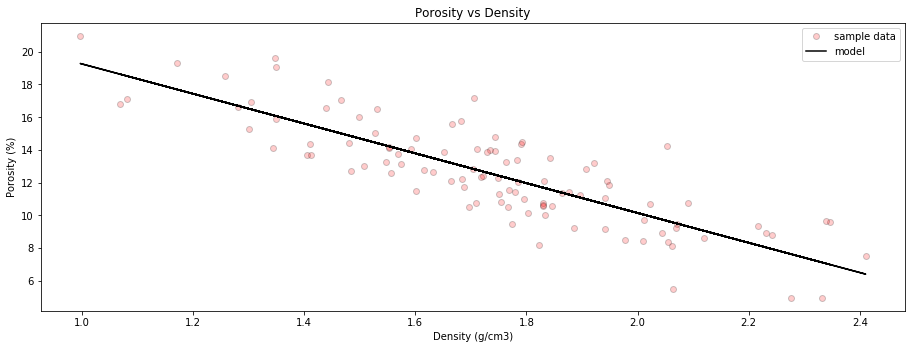

In [38]:
plt.subplot(111)
plt.plot(den, por, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.plot(den, intercept + slope*den, label='model', color = 'black')
plt.title('Porosity vs Density')
plt.xlabel('Density (g/cm3)')
plt.ylabel('Porosity (%)')
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()


The model looks reasonable. Let's go beyond occular inspection.

#### Model Checking

Let's test the slope with the following hypothesis test:

\begin{equation}
H_0: b_{1} = 0.0
\end{equation}

\begin{equation}
H_1: b_{1} \ne 0.0
\end{equation}

and see if we can reject this hypothesis, $H_{0}$ , that the slope parameter is equal to 0.0.  If we reject this null hypothesis, we show that the slope is meaning full and there is a linear relationship between density and porosity that we can use.

Fortunately, the $linregress$ function from the $stats$ package provides us with the two sided p-value for this test.  

In [16]:
print('Two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero = ' + str(p_value) + '.')      

Two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero = 7.744611355359746e-29.


We reject the null hypothesis and adopt the alternative hypothesis, $H_1$, that the slope is not equal to 0.0.

We can also observe correlation coefficient, $r$ value, and the $r^2$ value that indicates the proportion of variance that is described for our model. 

In [28]:
print('The correlation coefficient is = ' + str(round(r_value,2)) + ' and the r-squared value = ', str(round(r_value**2,2)))

The correlation coefficient is = -0.84 and the r-squared value =  0.7


#### Confidence Intervals

Let's calculate the 95% confidence interval for the slope parameter, $b_1$ of our model.

We first need the $t_{critical}$ value, given $alpha = 0.95$ and $df = n-2$.

In [44]:
t_critical = st.t.ppf([0.025,0.975], df=len(den)-2)
print('The t critical lower and upper values are ' + str(t_critical))
print('and the t statistic is ' + str(round(slope/std_err,2)))

The t critical lower and upper values are [-1.98326414  1.98326414]
and the t statistic is -15.58
The slope confidence interval is -9.1+/-1.16
The slope P02.5 and P97.5 are [-10.26291645  -7.94487295]


We see a consistent result with the previousl hypothesis, since the t statistic is outside the t critical lower and upper interval, we reject the null hypothesis, $h_0$, that the slope, $b_1$ is equal to 0.0.

Next let's calculate the confidence interval of the slope.  We just need our t critical and the standard error in the slope.

In [45]:
print('The slope confidence interval is ' + str(round(slope,2)) + '+/-' + str(round(t_critical[1] * std_err,2)))
print('The slope P02.5 and P97.5 are ' + str( slope + t_critical*std_err))

The slope confidence interval is -9.1+/-1.16
The slope P02.5 and P97.5 are [-10.26291645  -7.94487295]


#### Prediction

Let's use this model to make a prediction at all the data locations.  

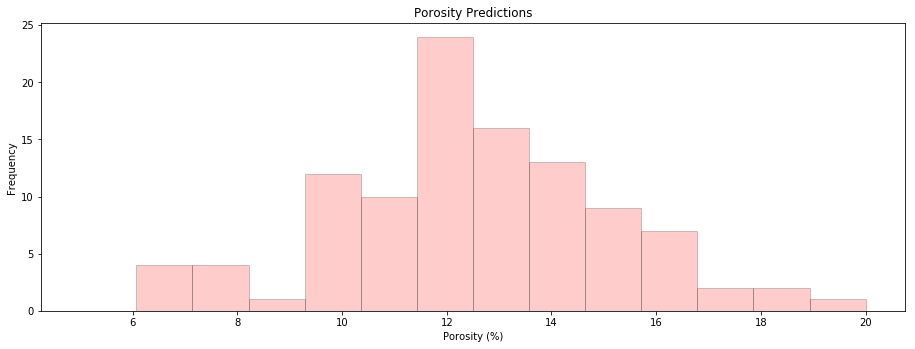

In [24]:
por_hat = slope * den + intercept
plt.subplot(111)
plt.hist(por_hat, color = 'red', alpha = 0.2, edgecolor = 'black', bins = np.linspace(5,20,15))
plt.xlabel('Porosity (%)'); plt.ylabel('Frequency'); plt.title('Porosity Predictions')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()


It is useful to plot the predictions of porosity and porosity data vs. the density data. From this plot we can observe the linear limitation of our model and get a sense of the unexplained variance $\frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2} {n-1}$

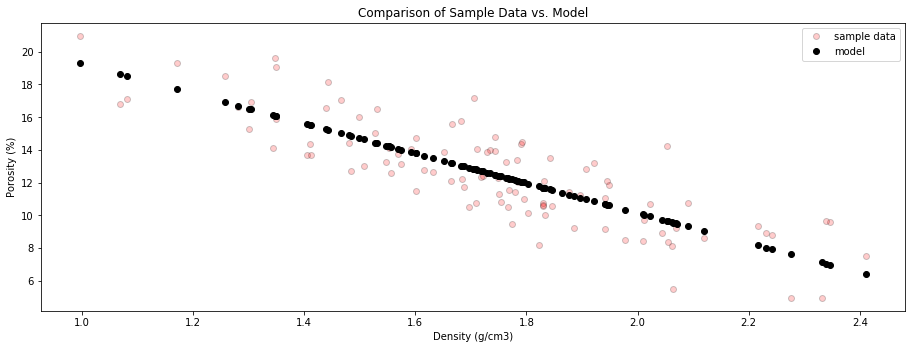

In [39]:
plt.subplot(111)
plt.plot(den, por, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.plot(den, por_hat, 'o', label='model', color = 'black')
plt.title('Comparison of Sample Data vs. Model')
plt.xlabel('Density (g/cm3)')
plt.ylabel('Porosity (%)')
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

Next let's calculate the residual and check their distribution.  Residuals are the true values at the data locations minus the estimates at the data locations, $y_i - \hat{y}_i$.  We want to make sure the average is close to 0.0 and to observe the shape and spread of the residual distribution.

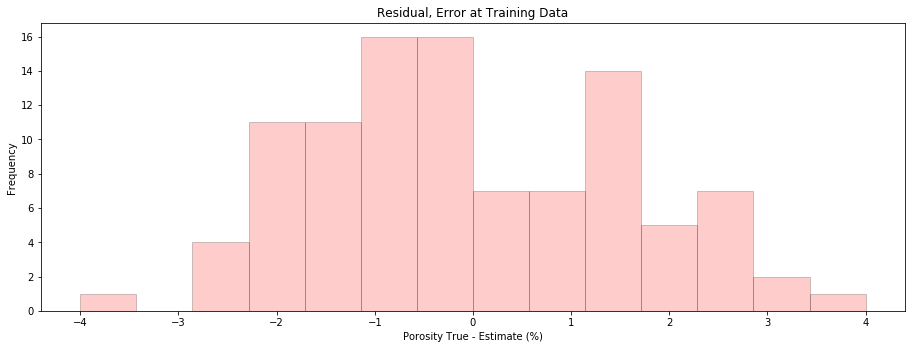

The average of the residuals is -0.0


In [30]:
residual = por - por_hat

plt.subplot(111)
plt.hist(residual, color = 'red', alpha = 0.2, edgecolor = 'black', bins = np.linspace(-4,4,15))
plt.title("Residual, Error at Training Data"); plt.xlabel('Porosity True - Estimate (%)');plt.ylabel('Frequency')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

print('The average of the residuals is ' + str(round(np.mean(residual),2)))

Next we will check the residual vs. the fitted value.  We want to see if the errors are consistent over the range of fitted values.  For example, we could use this plot to identify higher error or systematic under- or overestimation over a specific range of fitted values.

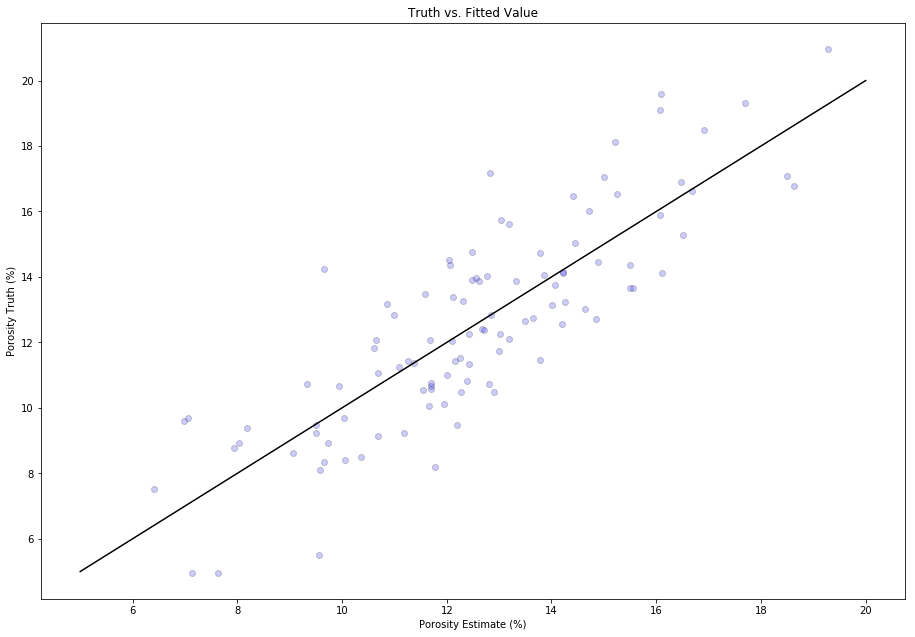

In [37]:
plt.subplot(111)
plt.plot(por_hat, por, 'o', color = 'blue', alpha = 0.2, markeredgecolor = 'black')
plt.plot([5,20], [5,20], 'black')
plt.title('Truth vs. Fitted Value')
plt.xlabel('Porosity Estimate (%)')
plt.ylabel('Porosity Truth (%)')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.2, hspace=0.2)
plt.show()


#### Comments

Linear regression is efficient with the $stats$ functions of the $SciPy$ package in $Python$. With one line of code we can build a model and get the outputs needed to make predictions and check the model.  I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
On twitter I'm the @GeostatsGuy.


***

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
